## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx
import glob
from collections import Counter

plt.rcParams['figure.figsize'] = (12,6)

In [2]:
directory = 'socio.xls' 
files = glob.glob(directory)[0]
files

'socio.xls'

In [3]:
df2 = pd.read_excel(files,None)
sheetnames = list(df2.keys())
for x in range(1,len(sheetnames)):
    exec('M%x = pd.read_excel(files, sheet_name = sheetnames[x])' % x)
description = pd.read_excel('socio.xls', sheet_name='Description', skiprows=4, index_col=0) #описание исходных данных

In [4]:
directory = '*.xlsx' 
files = glob.glob(directory)[0]
files

'pm1701_results.xlsx'

In [5]:
df = pd.read_excel(files)
df.head()

,№,Фамилия И. О.,ВУЗ,Направление,Курс,Группа,Возраст,"Баллы по дисциплине ""Организация и управление бизнес-процессами""",Общий рейтинг 50 лучших по 4 курсу факультета Инфокоммуникационных технологий,Общий рейтинг 50 лучших по 3 курсу факультета Инфокоммуникационных технологий,...,КОНФОРМНОСТЬ: дельта,ТРАДИЦИИ: дельта,"ЩЕДРОСТЬ, ДОБРОТА: дельта",УНИВЕРСАЛЬНОСТЬ: дельта,САМОСТОЯТЕЛЬНОСТЬ: дельта,ЭКСТРЕМАЛЬНОСТЬ: дельта,ГЕДОНИЗМ: дельта,ДОСТИЖЕНИЕ: дельта,ВЛАСТЬ: дельта,БЕЗОПАСНОСТЬ: дельта
0,0,Гульбис Роман Александрович,СПбГЭУ,Прикладная математика и информатика,3,ПМ1701,20,63,NaN,12,...,2.75,-1.30,1.30,0.333333,-0.40,0.000000,4.333333,1.0,-1.250000,-2.2
1,1,Дец Мария Михайловна,СПбГЭУ,Прикладная математика и информатика,3,ПМ1701,20,100,NaN,8,...,0.00,-1.55,1.65,2.000000,-0.60,-0.666667,-1.333333,1.0,-1.833333,-1.2
2,2,Дудник Олег Игоревич,СПбГЭУ,Прикладная математика и информатика,3,ПМ1701,20,75,NaN,11,...,-2.50,-3.00,0.25,-0.666667,3.35,2.000000,0.000000,2.0,2.250000,-3.4
3,3,Карпова Софья Сергеевна,СПбГЭУ,Прикладная математика и информатика,3,ПМ1701,20,93,NaN,2,...,3.00,-1.55,0.85,-0.083333,-0.80,1.000000,1.000000,1.0,-0.916667,0.4
4,4,Логойда Роман Васильевич,СПбГЭУ,Прикладная математика и информатика,3,ПМ1701,20,97,NaN,6,...,-0.75,-1.70,2.30,0.291667,-0.90,-0.333333,-0.666667,-0.5,-2.083333,0.2


In [6]:
def visualisation(table,name):
    cmap  = plt.cm.cividis
    plt.figure (figsize=(15, 10))
    plt.title (description.loc[name][0])
    
    G = nx.DiGraph (np.array(table))
    values =list (table.sum(axis=0).to_dict().values())
    #nx.draw_networkx_labels(G,pos=nx.shell_layout(G),labels = dictir)
    nc = nx.draw(G, pos=nx.shell_layout(G), with_labels=True, \
             node_color= values, node_size=1000, cmap=cmap,\
            vmin = min(values),vmax = max(values))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(values), vmax=max(values)))
    sm._A = []
    plt.colorbar(sm)
    
    plt.show() 

Визулизация социоматрицы

# 1. Проверка гипотезы о дружбе людей с одинаковыми ценнностями

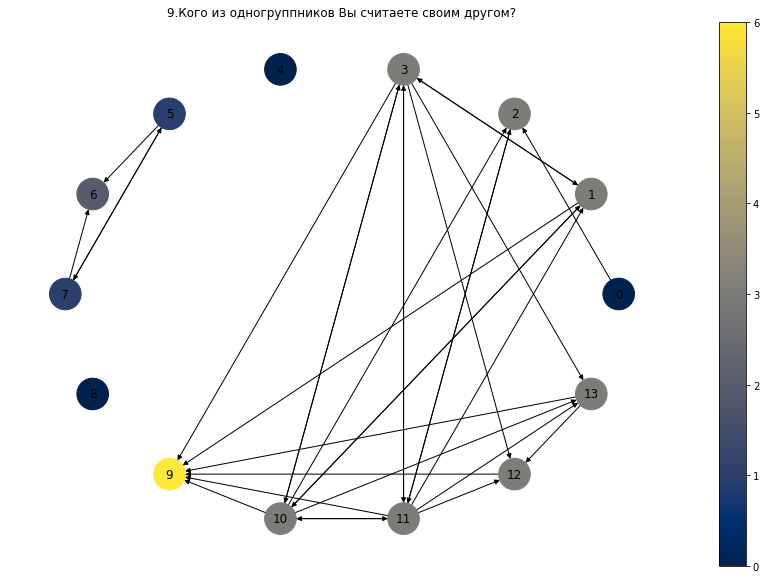

In [7]:
visualisation(M9,'M9')

## Разобьем на три таблицы - реальные, фактические и разность между ними.

In [8]:
data_1= df[df.columns[80:90]].fillna(0)
data_2= df[df.columns[90:100]].fillna(0)
data_3= df[df.columns[101:111]].fillna(0)

### Compute pairwise correlation of columns, excluding NA/null values.

Транспонируем таблицу для того, чтобы найти корреляцию между данными выборки студентов

In [9]:
pearson1,pearson2,pearson3 = data_1.transpose().corr(method ='pearson'),\
data_2.transpose().corr(method ='pearson') ,data_3.transpose().corr(method ='pearson')

In [10]:
kendall1,kendall2,kendall3 = data_1.transpose().corr(method ='kendall'),\
data_2.transpose().corr(method ='kendall') ,data_3.transpose().corr(method ='kendall')

Построим корреляционные матрицы

Text(0.5, 1.0, 'Kendall Correlation | Real')

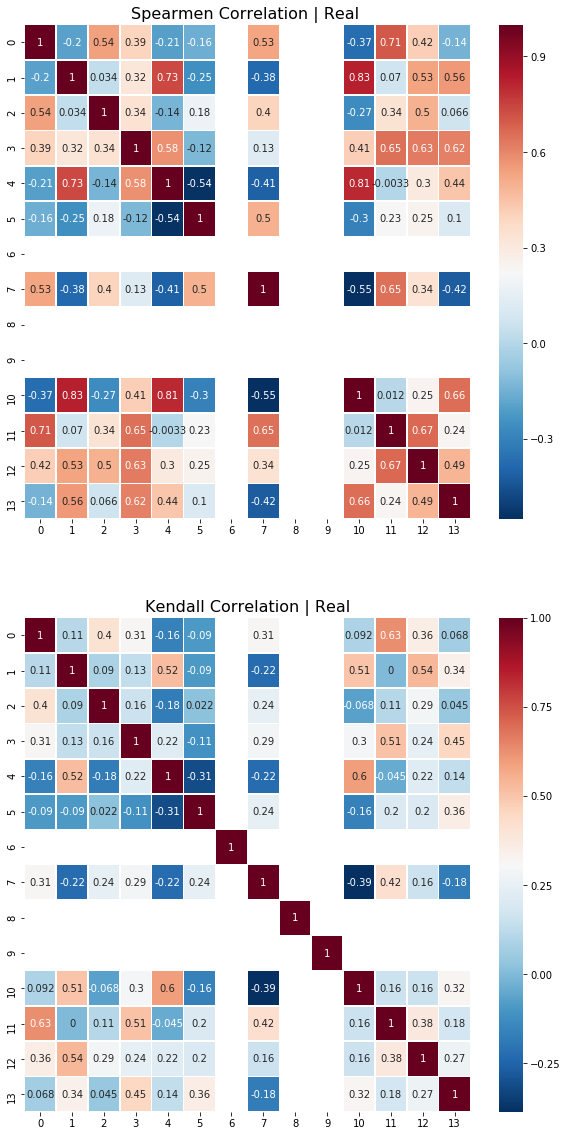

In [11]:
fig, axes = plt.subplots(2, figsize=(10,20))
res_1 = sns.heatmap(pearson1, 
            xticklabels=pearson1.columns,
            yticklabels=pearson1.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[0],
            linewidth=0.5)

axes[0].set_title("Spearmen Correlation | Real ", fontsize=16)

res_1 = sns.heatmap(kendall1, 
            xticklabels=pearson1.columns,
            yticklabels=pearson1.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[1],
            linewidth=0.5)

axes[1].set_title("Kendall Correlation | Real", fontsize=16)

Text(0.5, 1.0, 'Kendall Correlation | Fact')

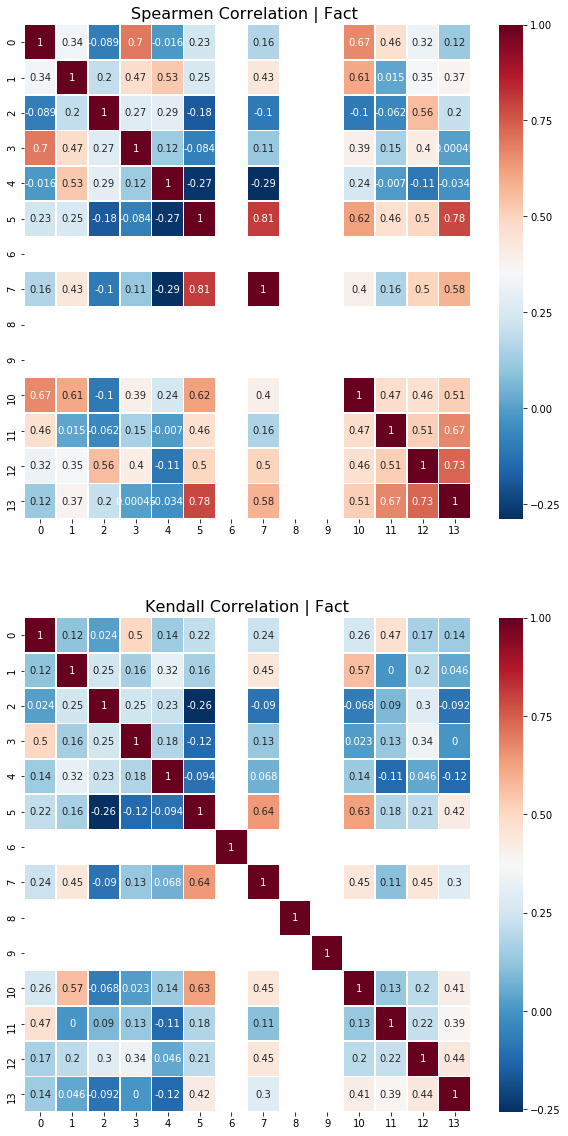

In [12]:
fig, axes = plt.subplots(2, figsize=(10,20))
res_1 = sns.heatmap(pearson2, 
            xticklabels=pearson2.columns,
            yticklabels=pearson2.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[0],
            linewidth=0.5)

axes[0].set_title("Spearmen Correlation | Fact ", fontsize=16)

res_1 = sns.heatmap(kendall2, 
            xticklabels=pearson2.columns,
            yticklabels=pearson2.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[1],
            linewidth=0.5)

axes[1].set_title("Kendall Correlation | Fact", fontsize=16)

Text(0.5, 1.0, 'Kendall Correlation | Difference')

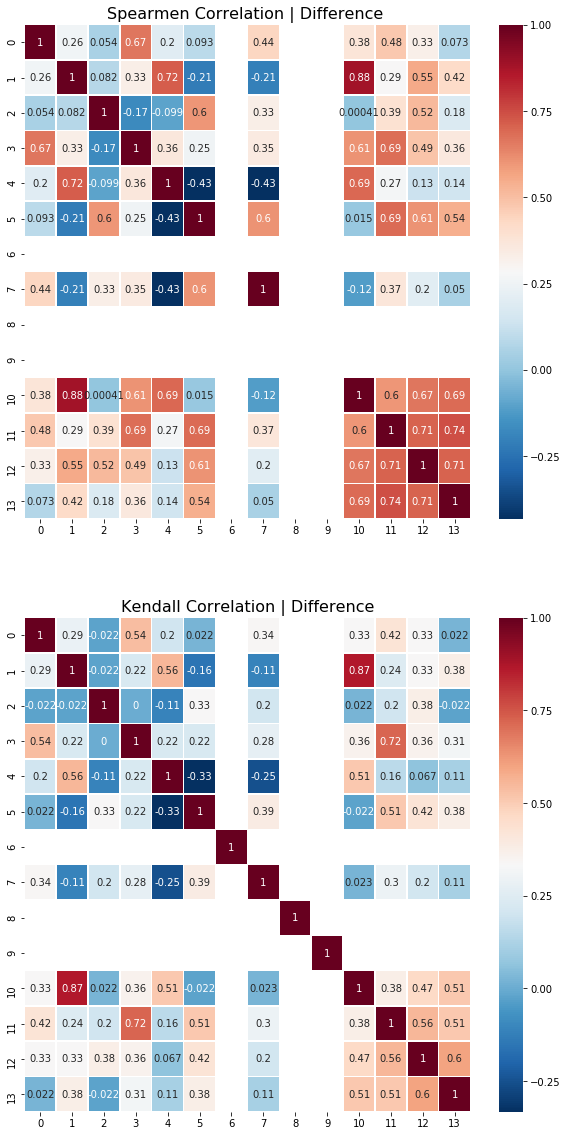

In [13]:
fig, axes = plt.subplots(2, figsize=(10,20))
res_1 = sns.heatmap(pearson3, 
            xticklabels=pearson3.columns,
            yticklabels=pearson3.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[0],
            linewidth=0.5)

axes[0].set_title("Spearmen Correlation | Difference ", fontsize=16)

res_1 = sns.heatmap(kendall3, 
            xticklabels=kendall3.columns,
            yticklabels=kendall3.columns,
            cmap='RdBu_r',
            annot=True,
            ax=axes[1],
            linewidth=0.5)

axes[1].set_title("Kendall Correlation | Difference", fontsize=16)

In [14]:
def add_correlation(prson, alpha, table, name):
    
    links = prson.stack().reset_index()
    links.columns = ['var1', 'var2','value']
    
    # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
    links_filtered = links.loc[ (abs(links['value']) > alpha) & (links['var1'] != links['var2'])]
    
    #Даем на вход ребра графа 
    G = nx.from_pandas_edgelist (links_filtered, 'var1', 'var2')
    
    #Узнаем значения корреляции для ребер, присутствующих в графе
    links_filtered["+"] = [ tuple (map (int,row)) for row in links_filtered[['var1','var2']].values]
    new = links_filtered[links_filtered["+"].isin(G.edges())]
    #словарь ребер и корреляции соответствующей
    
    dictionary = dict(zip(new["+"], new['value'].round(2)))
    nx.set_edge_attributes(G,dictionary,'weight')
    edges = list(Counter(G.edges()).items())
    
    cmap  = plt.cm.cividis
    
    plt.figure(figsize=(15, 10))
    plt.title(description.loc[name][0])
    
    G = nx.DiGraph (np.array(table))
    nx.set_edge_attributes (G, dictionary, 'weighted')
    labels = nx.get_edge_attributes (G, 'weighted')
    nx.draw_networkx_edge_labels (G, pos=nx.shell_layout(G), edge_labels=labels)
    
    
    values = list (table.sum(axis=0).to_dict().values())
    vmin = min (values)
    vmax = max (values)
    #nx.draw_networkx_labels(G,pos=nx.shell_layout(G),labels = dictir)
    nc = nx.draw (G, pos=nx.shell_layout(G), with_labels=True, \
             node_color= values, node_size=1000, cmap=cmap, vmin = vmin, vmax = vmax)

    sm = plt.cm.ScalarMappable (cmap=cmap, norm=plt.Normalize (vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm)

    plt.show() 

Выводится информация из социоматрицы и коэффициентами корреляции.
$\alpha$ - заданный уровень корреляции, выше которого мы хотим видеть связь

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


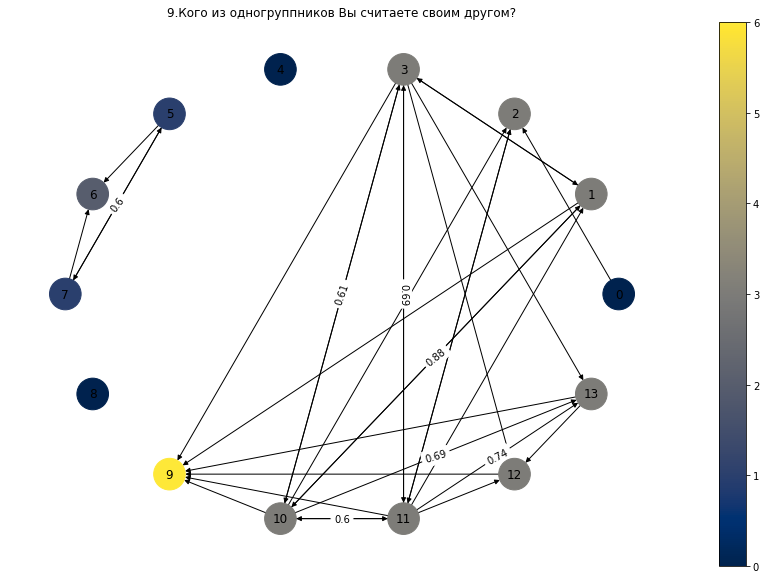

In [15]:
full_corr = [pearson1,pearson2,pearson3,kendall1,kendall2,kendall3]

add_correlation(full_corr[2],0.5,M9,'M9')

**Вывод:** скорее всего, такой зависимости в общем виде *не существует*, только между отдельными индивидами 

# 2. Влияние дружбы на успеваемость студентов

На самом деле данных совершенное нет - есть ранговая позиция по баллам и один предмет. 
Поэтому просто сопоставим каждому ученику его рейтинговый бальный список за прошлый семестр и посмотрим, совпадают ли успеваемости и друзья.

In [16]:
def visualisation2(table,name):
    cmap  = plt.cm.cividis
    plt.figure (figsize=(15, 10))
    plt.title (description.loc[name][0])
    
    G = nx.DiGraph (np.array(table))
    values =list (table.sum(axis=0).to_dict().values())
    nx.draw_networkx_labels(G,pos=nx.shell_layout(G),labels = df[df.columns[9]],font_color = "red")
    nc = nx.draw(G, pos=nx.shell_layout(G), with_labels=False, \
             node_color= values, node_size=1000, cmap=cmap,\
            vmin = min(values),vmax = max(values))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(values), vmax=max(values)))
    sm._A = []
    plt.colorbar(sm)
    
    plt.show() 

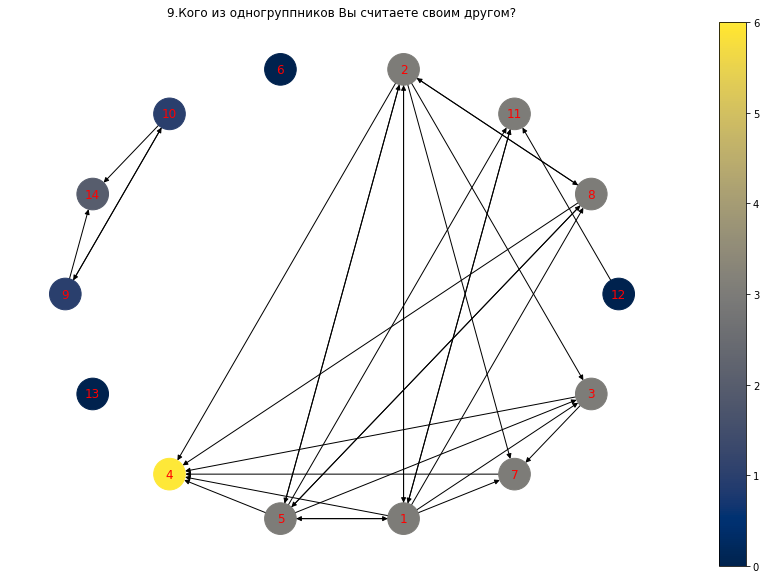

In [17]:
visualisation2(M9,'M9')

Мы взяли социоматрицу, но теперь на месте номеров по списку идут номера по баллам в рейтинговой системе за последний семестр.
В принципе можно увидеть, что существует какая-то общая группа друзей, занимающая первую половину списка. Потом идут мелкие группы, занимающие нижнюю половину.